In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [11]:
# Load the datasets
cleaned_df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_2020_cleaned_D2.csv')

In [12]:
cleaned_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Data preprocessing
# Encode categorical variables
label_encoders = {}
for column in cleaned_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    label_encoders[column] = le

X = cleaned_df.drop('HeartDisease', axis=1)
y = cleaned_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

In [6]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

In [7]:
# Make predictions
y_pred = mlp.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [9]:
# Print formatted accuracy
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.91


In [10]:
# Print formatted classification report
print("Classification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"\nClass {label}:")
        for metric, value in metrics.items():
            if metric in ['precision', 'recall', 'f1-score', 'support']:
                print(f"  {metric}: {value:.2f}")
    else:
        print(f"\n{label}: {metrics:.2f}")

Classification Report:

Class 0:
  precision: 0.92
  recall: 1.00
  f1-score: 0.95
  support: 58367.00

Class 1:
  precision: 0.57
  recall: 0.05
  f1-score: 0.10
  support: 5592.00

accuracy: 0.91

Class macro avg:
  precision: 0.74
  recall: 0.53
  f1-score: 0.53
  support: 63959.00

Class weighted avg:
  precision: 0.89
  recall: 0.91
  f1-score: 0.88
  support: 63959.00


In [13]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[58140   227]
 [ 5290   302]]

True Positives(TP) =  58140

True Negatives(TN) =  302

False Positives(FP) =  227

False Negatives(FN) =  5290


<Axes: >

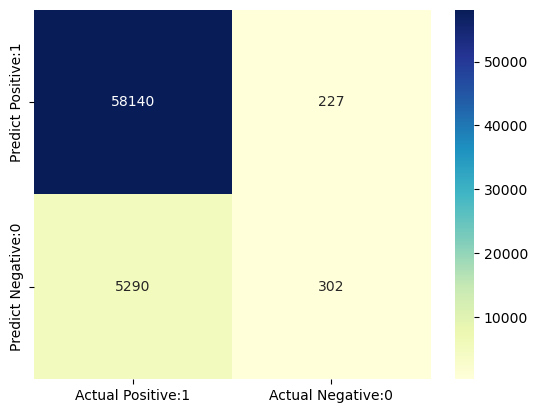

In [14]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')